<img src="https://drive.google.com/uc?id=1fqvUVxD8GcnwREynD5HQYndqP68SnIBd">

## Objective

**The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival. MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.**

## Data Description 

MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.

The data includes:

**Training data** for 91,713 encounters.  
**Unlabeled test data** for 39,308 encounters, which includes all the information in the training data except for the values for hospital_death.  
**WiDS Datathon 2020 Dictionary** with supplemental information about the data, including the category (e.g., identifier, demographic, vitals), unit of measure, data type (e.g., numeric, binary), description, and examples.  
**Sample submission files**

## Ensemble Learning : 

A collection of several models working together on a single set is called an Ensemble and the method is called **Ensemble Learning.**

**Ensemble methods combine several trees base algorithms to construct better predictive performance than a single tree base algorithm. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner, thus increasing the accuracy of the model. When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are noise, variance, and bias.**

<img src = 'https://drive.google.com/uc?id=1xy2wdrEKk0Y78N_WPni-rieltXXeYQlF'>

Pic Credit: medium.com

## Voting Classifier : 

**A Voting Classifier** is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. 

Voting Classifier supports two types of votings.

**Hard Voting:** In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. 

**Soft Voting:** In soft voting, the output class is the prediction based on the average of probability given to that class. 

<img src = 'https://drive.google.com/uc?id=1Ghsr8dhLX7pbnQRYA8-YZPnz2-9V050f' >

Pic Credit : iq.opengenus.org

## When to use Voting Classifier ?

Voting classifier is a powerful method and can be a very good option when a single method shows bias towards a particular factor. This method can be used to derive a generalized fit of all the individual models.

## Scikit-learn :

Scikit-learn is the most useful library for machine learning in Python and the library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.**

## Import the relevant libraries

In [1]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier ,VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Read the dataset

In [2]:
# loading dataset 
training_v2 = pd.read_csv("../input/widsdatathon2020/training_v2.csv")
test = pd.read_csv("../input/widsdatathon2020/unlabeled.csv")

In [3]:
# creating independent features X and dependant feature Y
y = training_v2['hospital_death']
X = training_v2
X = training_v2.drop('hospital_death',axis = 1)
test = test.drop('hospital_death',axis = 1)

In [4]:
# Remove Features with more than 75 percent missing values
train_missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
train_missing = train_missing.index[train_missing > 0.75]
X = X.drop(columns = train_missing)
test = test.drop(columns = train_missing)

In [5]:
categoricals_features = ['hospital_id','ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']
X = X.drop(columns = categoricals_features)
test = test.drop(columns = categoricals_features)

In [6]:
# Imputation transformer for completing missing values.
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(X))
test_data = pd.DataFrame(my_imputer.fit_transform(test))
new_data.columns = X.columns
test_data.columns = test.columns
X= new_data
test = test_data

## Train/Test Split :

The data is split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.The above is achieved in Scikit-Learn library using the train_test_split method.

In [7]:
# Split into training and validation set
X_train, valid_features, Y_train, valid_y = train_test_split(X, y, test_size = 0.25, random_state = 1)

## Gradient boosting Classifier :

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. The intuition behind gradient boosting algorithm is to repetitively leverage the patterns in residuals and strengthen a model with weak predictions and make it better. 

In [8]:
# Gradient Boosting Classifier
GBC = GradientBoostingClassifier(random_state=1)


## Random Forest Classifier

Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction . The fudamental concept of Random Forest is that large number of relatively uncorrelated modelsoperating as a committee will outperform any of the individual constituent models

In [9]:
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100)


In [10]:
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('rfc', RFC),('gbc',GBC)], voting='soft')
votingC = votingC.fit(X_train, Y_train)

In [11]:
predict_y = votingC.predict(valid_features)

## AUC - ROC Curve :

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

<img src = "https://drive.google.com/uc?id=1QFpY4TjfXYfKrCiRl1BcePuFEXOQ8-pX">

In [12]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

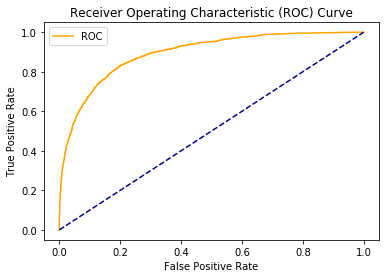

AUC-ROC : 0.8931069190154506


In [13]:
probs = votingC.predict_proba(valid_features)
probs = probs[:, 1]
auc = roc_auc_score(valid_y, probs)
fpr, tpr, thresholds = roc_curve(valid_y, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)


## Submissions :

Submissions will be evaluated on the Area under the Receiver Operating Characteristic (ROC) curve between the predicted mortality and the observed target (hospital_death)

In [14]:
test1 = test.copy()
test1["hospital_death"] = votingC.predict(test)
test1[["encounter_id","hospital_death"]].to_csv("submission5.csv",index=False)
test1[["encounter_id","hospital_death"]].head()

,encounter_id,hospital_death
0,2.0,0
1,5.0,0
2,7.0,0
3,8.0,0
4,10.0,0


References :

Lee, M., Raffa, J., Ghassemi, M., Pollard, T., Kalanidhi, S., Badawi, O., Matthys, K., Celi, L. A. (2020). WiDS (Women in Data Science) Datathon 2020: ICU Mortality Prediction. PhysioNet. doi:10.13026/vc0e-th79

Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

https://iq.opengenus.org/voting-classifier/

https://medium.com/ml-research-lab/ensemble-learning-the-heart-of-machine-learning-b4f59a5f9777

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

https://stackabuse.com/understanding-roc-curves-with-python/